In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *


import time
import tensorflow as tf
tf.set_random_seed(1)

import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Keras 2.1.5 TF 1.6.0 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del [x_test,y_test]

In [3]:
np.random.seed(seed=486)
idx=np.empty(0,dtype="int8")
#loop over each class label and sample 100 random images over each label and save the idx to subset later 
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


In [5]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [6]:
model = VGG16(weights='imagenet', include_top=True,input_shape=(224,224,3))


In [7]:
fc1=model.get_layer("fc1")
fc1_weights=fc1.get_weights()


In [8]:
#get weights and bias of the fc1 weight list
W=(fc1_weights[0])
b=(fc1_weights[1])
print(W.shape)
print(b.shape)

(25088, 4096)
(4096,)


In [9]:
#define a "new model" that only goes until the flatten layer
from keras.models import Model
model_flaten_layer = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

In [10]:
from scipy import misc
img=np.zeros((28,28,3))
img[:,:,0]=x_train[0]
img[:,:,1]=x_train[0]
img[:,:,2]=x_train[0]
img_resized=misc.imresize(img,[224,224])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


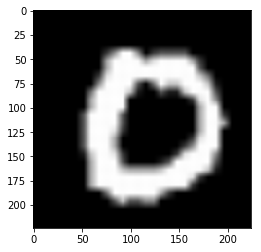

In [11]:
plt.imshow(img_resized)

In [12]:
EMB_train=np.zeros((len(x_train),4096))
for i in range(0,len(x_train)):
    img=np.zeros((28,28,3))
    img[:,:,0]=x_train[i]
    img[:,:,1]=x_train[i]
    img[:,:,2]=x_train[i]
    img_resized=misc.imresize(img,[224,224])
    img_resized=np.asarray(img_resized,dtype="float64")
    img_resized = np.expand_dims(img_resized, axis=0)
    img_resized = preprocess_input(img_resized)
    features=model_flaten_layer.predict(img_resized)
    EMB_train[i]=np.matmul(features,W)+b
    if i % 50 == 0:
        print(i)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [13]:
EMB_train[0]

array([-1.74709702,  0.66951329, -1.37359047, ...,  2.3823154 ,
       -5.34684944,  5.45150518])

In [14]:
np.savez_compressed("Mnist_EMB_1000",EMB_train)

In [15]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
del [x_test,y_test]

170500096/170498071 [==============================] - 77s 0us/step


In [16]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(50000, 32, 32, 3)
(50000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [17]:
np.random.seed(seed=222)
idx=np.empty(0,dtype="int8")
#loop over each class label and sample 100 random images over each label and save the idx to subset later 
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [18]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 32, 32, 3)
(1000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


In [19]:
from scipy import misc
img=x_train[0]
img_resized=misc.imresize(img,[224,224])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(224, 224, 3)


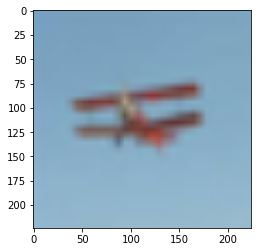

In [22]:
plt.imshow(img_resized)
print(img_resized.shape)

In [23]:
EMB_train=np.zeros((len(x_train),4096))
for i in range(0,len(x_train)):
    img=x_train[i]
    img_resized=misc.imresize(img,[224,224])
    img_resized=np.asarray(img_resized,dtype="float64")
    img_resized = np.expand_dims(img_resized, axis=0)
    img_resized = preprocess_input(img_resized)
    features=model_flaten_layer.predict(img_resized)
    EMB_train[i]=np.matmul(features,W)+b
    if i % 50 == 0:
        print(i)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [24]:
np.savez_compressed("cifar_EMB_1000",EMB_train)

In [25]:
EMB_train[0]

array([-3.29230762, -2.07093   , -3.05545378, ..., -1.37662101,
       -7.64843178, -2.29185486])